In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt

# Carregando base de dados  pré-processada

In [3]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].array
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [4]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [5]:
print(len(emailsText))

33341


# Representação vetorial TFIDF

In [6]:
tfidfVectorizer = TfidfVectorizer(analyzer="word",max_features=2100)

tfidfTransform = tfidfVectorizer.fit_transform(emailsText)

print(tfidfTransform)

  (0, 1593)	0.26470874972054786
  (0, 1098)	0.35510965844285625
  (0, 671)	0.34195431682743727
  (0, 535)	0.3142974755284843
  (0, 1663)	0.2523502664970415
  (0, 249)	0.0882891907360702
  (0, 1904)	0.14585506953003874
  (0, 861)	0.6284245513555586
  (0, 440)	0.21615559903629922
  (0, 1796)	0.23177737406989862
  (1, 1893)	0.12322552160237797
  (1, 432)	0.16667910623163265
  (1, 1405)	0.2023515027069684
  (1, 1910)	0.21821281232441633
  (1, 773)	0.252147976524646
  (1, 1814)	0.24651126769711865
  (1, 2073)	0.1442701571707954
  (1, 1342)	0.19540664510107641
  (1, 1962)	0.21745283397516152
  (1, 809)	0.3089620245082559
  (1, 1457)	0.1585651873255142
  (1, 297)	0.26945510026530634
  (1, 1102)	0.268483606738479
  (1, 105)	0.2304674552193428
  (1, 1514)	0.2375975711797802
  :	:
  (33340, 734)	0.1499328111246709
  (33340, 1274)	0.08454655116352783
  (33340, 1509)	0.09899129231263658
  (33340, 637)	0.15067486614547307
  (33340, 1426)	0.1353816153153684
  (33340, 1339)	0.22427638740937866
  (333

In [7]:
tfidfLabels = tfidfVectorizer.get_feature_names()
tfidfLabels

['aa',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'accept',
 'acceptance',
 'accepted',
 'access',
 'according',
 'account',
 'accounting',
 'accuracy',
 'achieve',
 'acquire',
 'acquired',
 'acquisition',
 'acrobat',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'acy',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'administration',
 'adobe',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'advertisement',
 'advertising',
 'advice',
 'advise',
 'advised',
 'advises',
 'advisor',
 'aep',
 'affair',
 'affect',
 'affiliate',
 'affiliated',
 'affordable',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'ail',
 'aimee',
 'air',
 'al',
 'alert',
 'alias',
 'align',
 'allen',
 'allocated',
 'allocation',
 'allow',
 'allowed',
 'allows',
 'alternative',
 'america',
 'amid',
 'amount',
 'amy',
 'analysis',
 'analyst',
 'ancillary',
 'andmanyother',
 'andrew',


In [8]:
dfTfidf = pd.DataFrame(data=tfidfTransform.toarray(), columns=tfidfLabels)

In [9]:
dfTfidf

,aa,ability,able,absolutely,abuse,accept,acceptance,accepted,access,according,...,xanax,xl,xp,yahoo,year,yes,yield,yo,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.143700,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,0.0,0.0,0.0,0.0,0.0,0.0,0.015667,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.013857,0.0,0.0,0.0,0.0,0.0,0.0
33337,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.207355,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
33338,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
33339,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Visualização de dados com TSNE

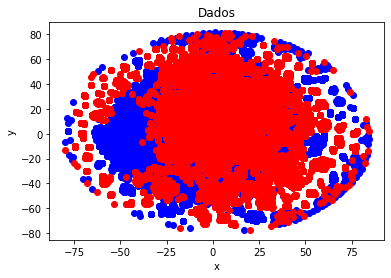

In [9]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(dfTfidf)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [17]:
def getModel():
    return GaussianNB()

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dfTfidf.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

0.9533663217873745

In [19]:
scores = cross_val_score(getModel(),dfTfidf.values,target,cv=10)

scores.mean()

0.9567198614250163

In [20]:
predicoes = cross_val_predict(getModel(), dfTfidf.values, target, cv=10)

In [21]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.94      0.97      0.96     16493
        Spam       0.97      0.94      0.96     16848

    accuracy                           0.96     33341
   macro avg       0.96      0.96      0.96     33341
weighted avg       0.96      0.96      0.96     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

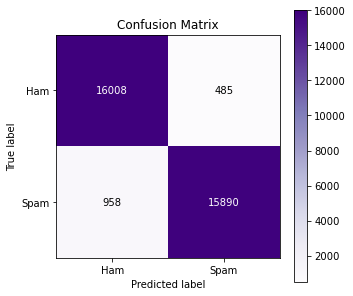

In [22]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

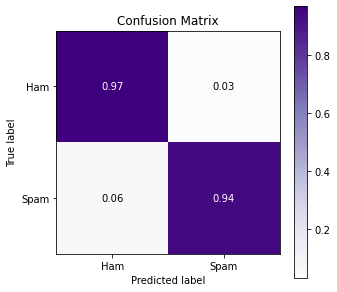

In [23]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()